In [1]:
import re
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# start Spark Session
from pyspark.sql import SparkSession
app_name = "hw4_notebook"
master = "local[*]"
spark = SparkSession\
        .builder\
        .appName(app_name)\
        .master(master)\
        .getOrCreate()
sc = spark.sparkContext

In [20]:
FIELDS=["Label","I1","I2","I3","I4","I5","I6","I7","I8","I9","I10","I11","I12","I13","C1","C2","C3","C4","C5","C6","C7","C8"
       ,"C9","C10","C11","C12","C13","C14","C15","C16","C17","C18","C19","C20","C21","C22","C23","C24","C25","C26"]

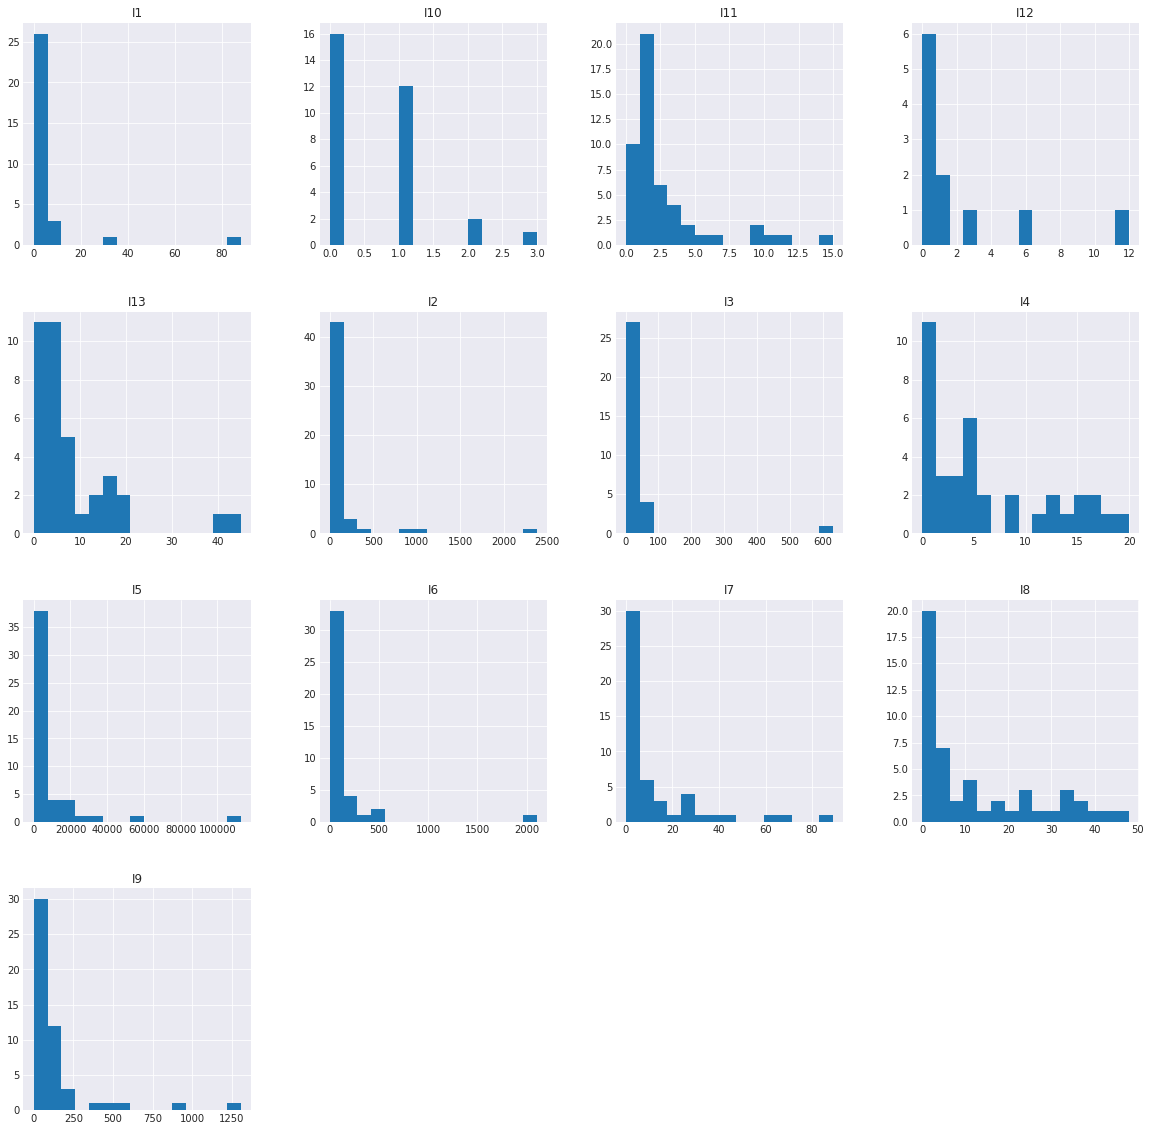

In [40]:
myfile = "data/toy_example.txt"
pDF = pd.read_csv(myfile,sep='\t',names=FIELDS)
pDF[FIELDS[1:14]].hist(figsize=(20,20), bins=15)
plt.show()

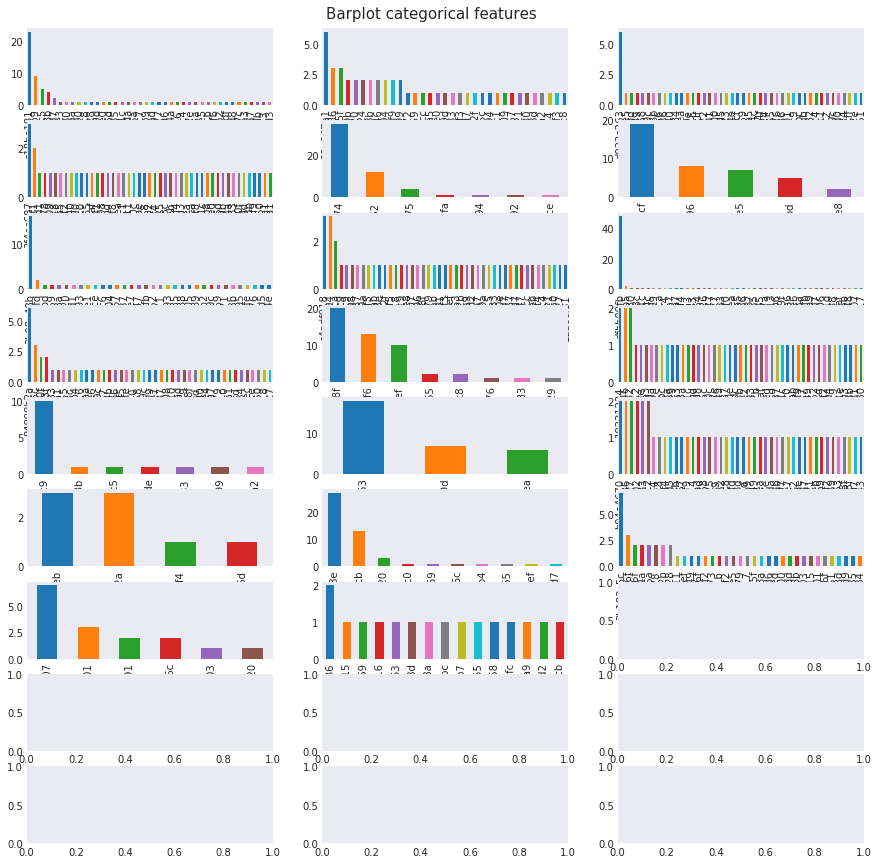

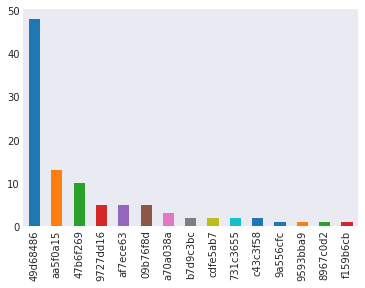

In [82]:
fig, ax_grid = plt.subplots(9, 3, figsize=(15,15))
for idx, feature in enumerate(FIELDS[14:]):
    x = pDF[feature].value_counts()
    #sns.barplot(x, ax=ax_grid[idx//8][idx%3], orient='h', linewidth=.5)
    x.plot(kind='bar',ax=ax_grid[idx//4][idx%3])
    ax_grid[idx//4][idx%3]
fig.suptitle("Barplot categorical features", fontsize=15, y=0.9)
plt.show()

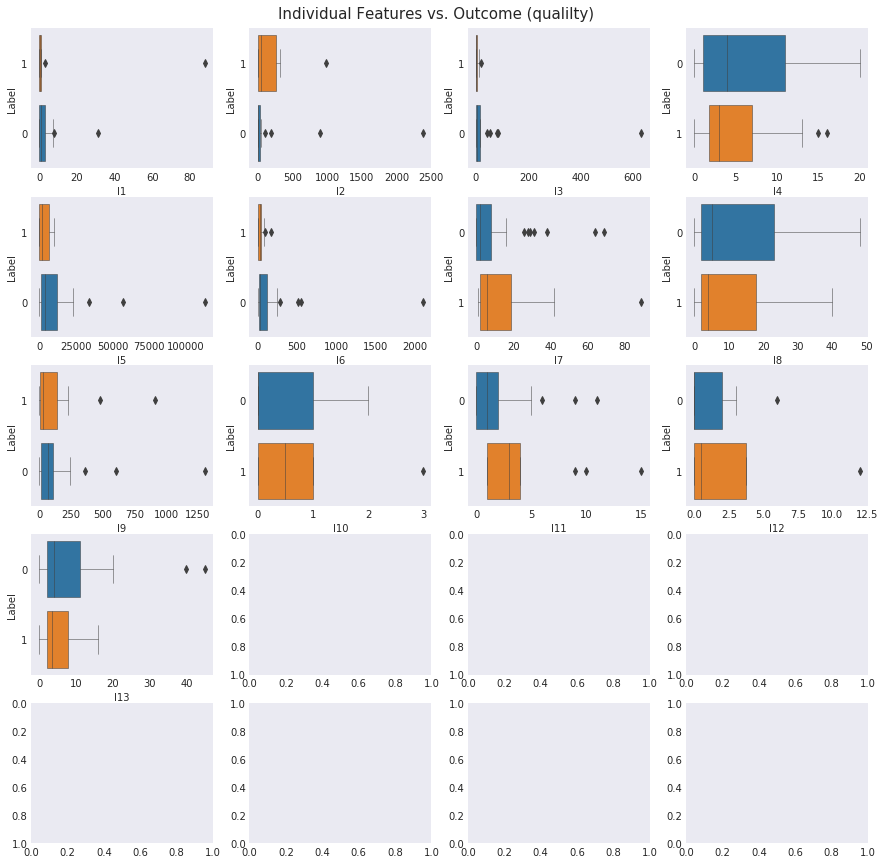

In [74]:
fig, ax_grid = plt.subplots(5, 4, figsize=(15,15))
y =  pDF['Label']
for idx, feature in enumerate(FIELDS[1:14]):
    x = pDF[feature]
    sns.boxplot(x, y, ax=ax_grid[idx//4][idx%4], orient='h', linewidth=.5)
    ax_grid[idx//3][idx%4].invert_yaxis()
fig.suptitle("Individual Features vs. Outcome (qualilty)", fontsize=15, y=0.9)
plt.show()

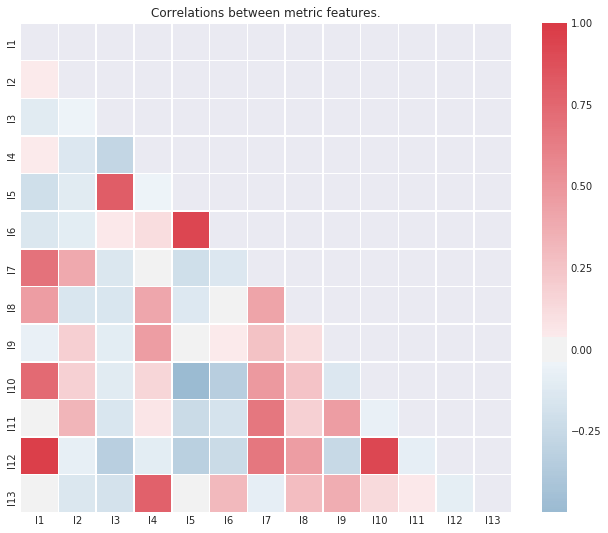

In [84]:
corr = pDF[FIELDS[1:14]].corr()
fig, ax = plt.subplots(figsize=(11, 9))
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(240, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, center=0, linewidths=.5)
plt.title("Correlations between metric features.")
plt.show()